# U.S. Medical Insurance Costs

The following is an analysis of a dataset on U.S. Medical Insurance Costs. The dataset contains data on 1,338 individuals across 7 features:

*   **age**
*   **sex**
*   **Body Mass Index**
*   **Number of Children**
*   **Smoker**
*   **Region where the individual comes from**
*   **Insurance Charges**













In [1]:
#Importing relevant packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#CSV reading
insurance = pd.read_csv("/content/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can see that there are no missing values in the dataset.

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Features Analysis

We can see that individuals range from 18-year olds to 64-year olds and the mean age is 39. Overall we would want a uniform distribution of ages. Besides 18 and 19-year olds, the number of individuals in each age bin stays around 23.

In [4]:
insurance.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

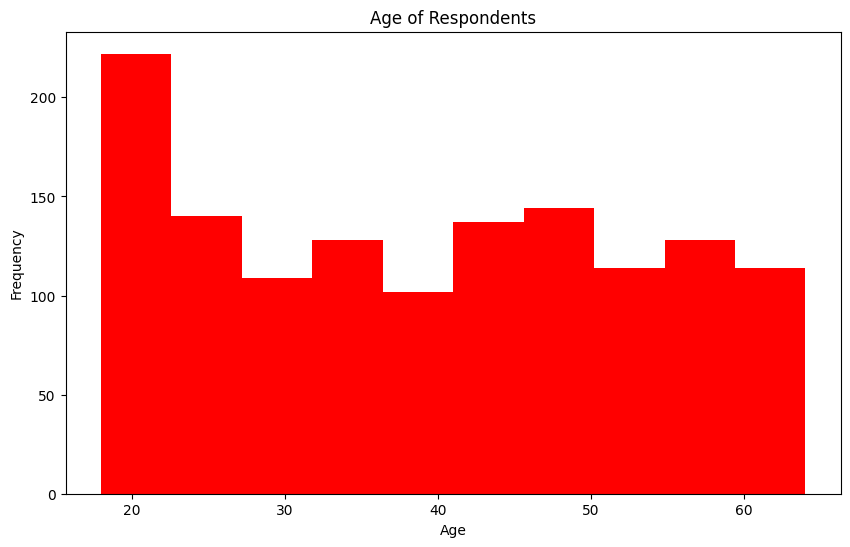

In [5]:
# Creating the histogram plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.hist(insurance.age, color='red')
# Adding titles and labels
plt.title('Age of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

The dataset is uniformely distributed across males and females.

In [6]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

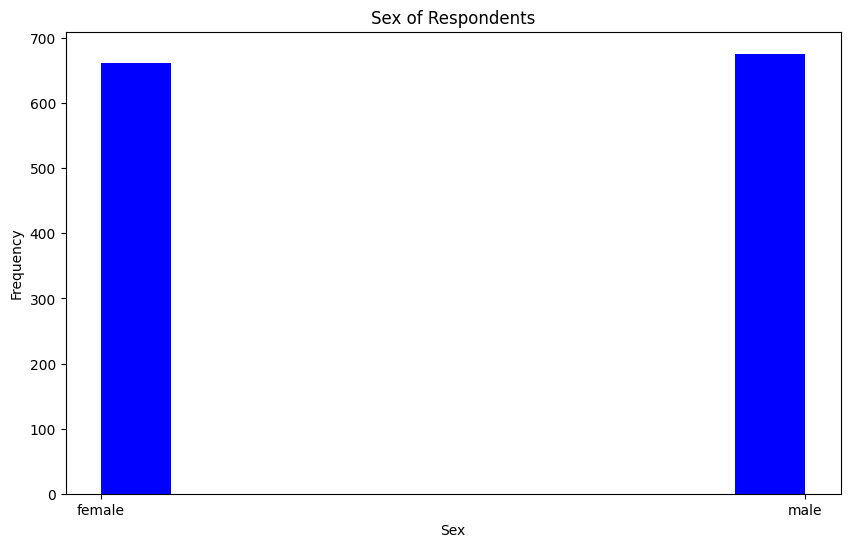

In [7]:
# Creating the histogram plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.hist(insurance.sex, color='blue')
# Adding titles and labels
plt.title('Sex of Respondents')
plt.xlabel('Sex')
plt.ylabel('Frequency')

# Showing the plot
plt.show()


Sex does not seem to be a discriminant in the analysis of insurance charges and smoker_status.

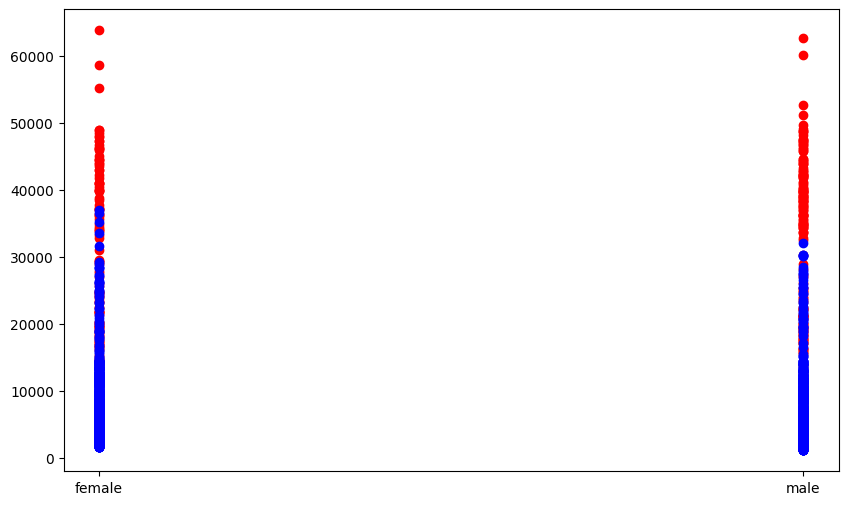

In [11]:
# Filtering smokers and non-smokers
smokers = insurance[insurance['smoker'] == 'yes']
non_smokers = insurance[insurance['smoker'] == 'no']

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.scatter(smokers['sex'], smokers['charges'], color='red', label='Smokers')
plt.scatter(non_smokers['sex'], non_smokers['charges'], color='blue', label='Non-Smokers')

In [17]:
smokers.sex.value_counts()

male      159
female    115
Name: sex, dtype: int64

In [18]:
non_smokers.sex.value_counts()

female    547
male      517
Name: sex, dtype: int64

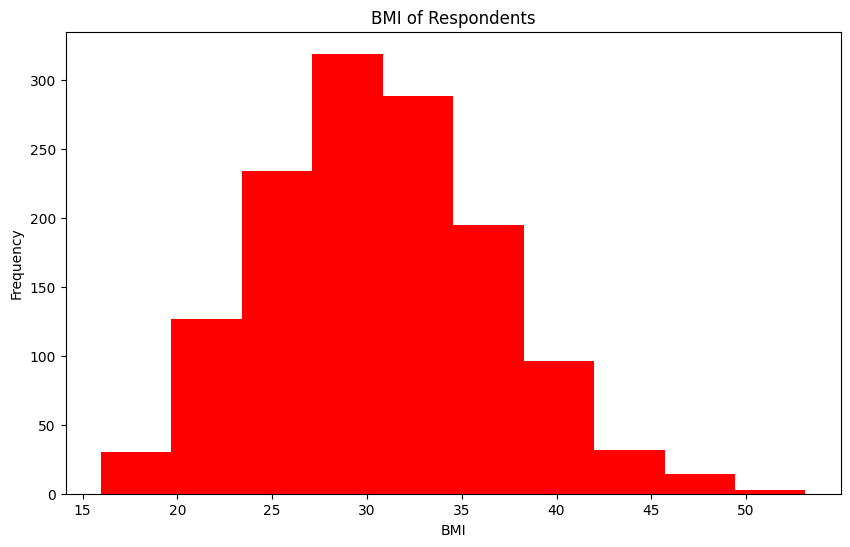

In [8]:
# Creating the histogram plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.hist(insurance.bmi, color='red')
# Adding titles and labels
plt.title('BMI of Respondents')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

There's an approximately Gaussian distribution of body mass indices among the individuals in the sample. Overall, we are skeptical of the relevance of this feature over the insurance charges.

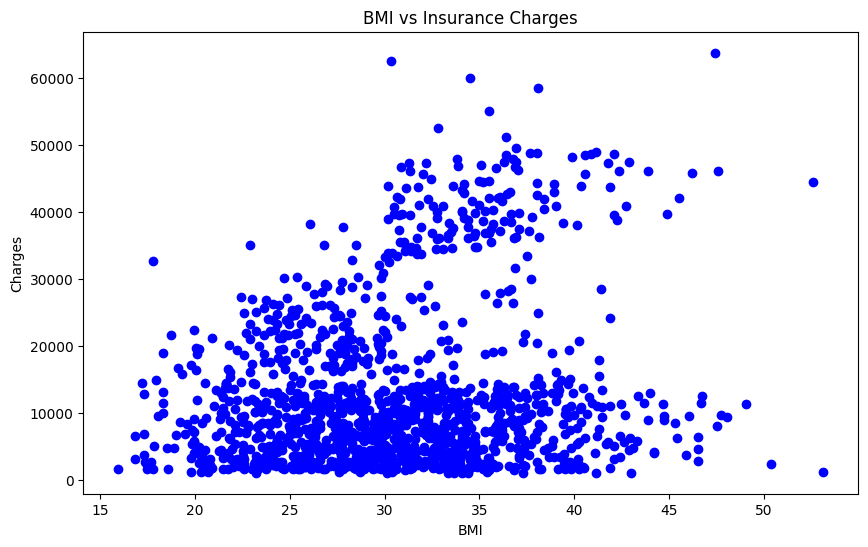

In [9]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.scatter(insurance.bmi, insurance.charges, color='blue')
# Adding titles and labels
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Showing the plot
plt.show()

Indeed we see an absence of linear relation between the two variables. However, further analysis with smoker status brings a completely different picture. We see two different trends between smokers and non-smokers and even between smokers with low BMI and smokers with high BMI.

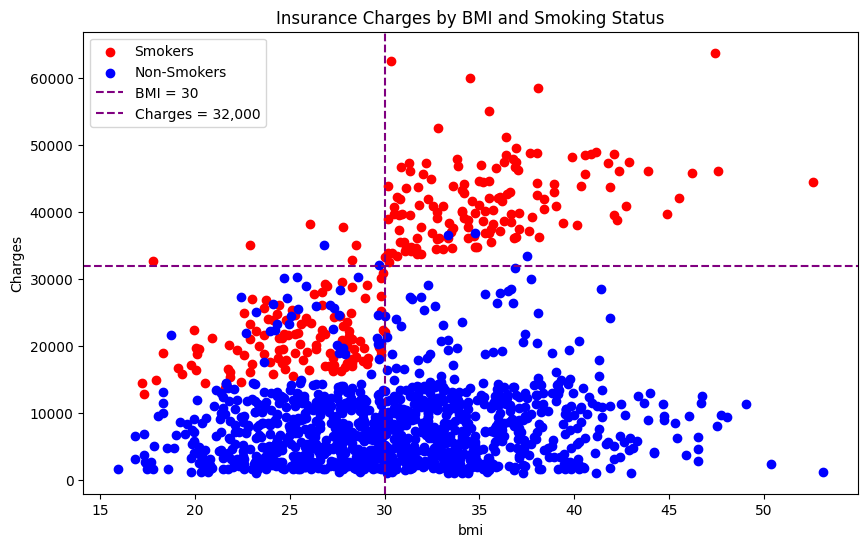

In [10]:
# Filtering smokers and non-smokers
smokers = insurance[insurance['smoker'] == 'yes']
non_smokers = insurance[insurance['smoker'] == 'no']

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.scatter(smokers['bmi'], smokers['charges'], color='red', label='Smokers')
plt.scatter(non_smokers['bmi'], non_smokers['charges'], color='blue', label='Non-Smokers')

# Adding a vertical line at BMI = 30
plt.axvline(x=30, color='purple', linestyle='--', label='BMI = 30')
# Adding a horizontal line at Charges = 32,000
plt.axhline(y=32000, color='purple', linestyle='--', label='Charges = 32,000')


# Adding titles and labels
plt.title('Insurance Charges by BMI and Smoking Status')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.legend()  # To add a legend to differentiate smokers and non-smokers

# Showing the plot
plt.show()

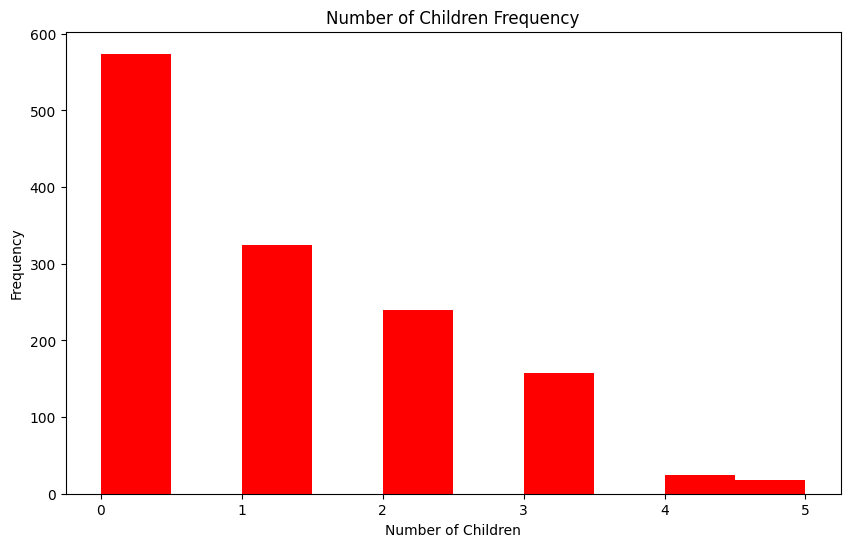

In [19]:
# Creating the histogram plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.hist(insurance.children, color='red')
# Adding titles and labels
plt.title('Number of Children Frequency')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

There is not a uniform distribution. There are more than 550 individuals with no children, almost equal to the number of individuals with 1 or 2 children. Still, the relation with insurance charges is irrelevant and inexistent as charges seem to not depend on the number of children. People with 4 and 5 children seem to have lower insurance charges but that may be due to the low number of data points relative to all the other categories.

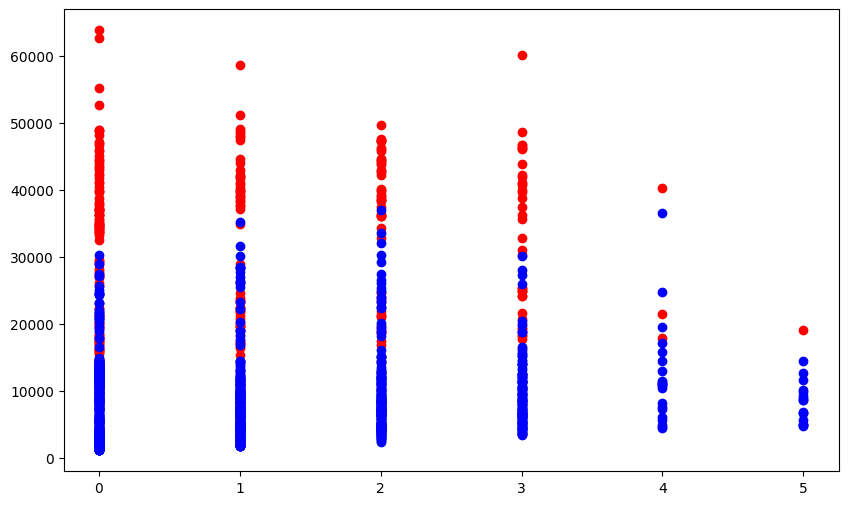

In [20]:
# Filtering smokers and non-smokers
smokers = insurance[insurance['smoker'] == 'yes']
non_smokers = insurance[insurance['smoker'] == 'no']

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.scatter(smokers['children'], smokers['charges'], color='red', label='Smokers')
plt.scatter(non_smokers['children'], non_smokers['charges'], color='blue', label='Non-Smokers')

We can see how the vast majority of the individuals in the set is a non-smoker. There does not seem to be a structural correlation with the region of origin of each individual.

(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1064.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

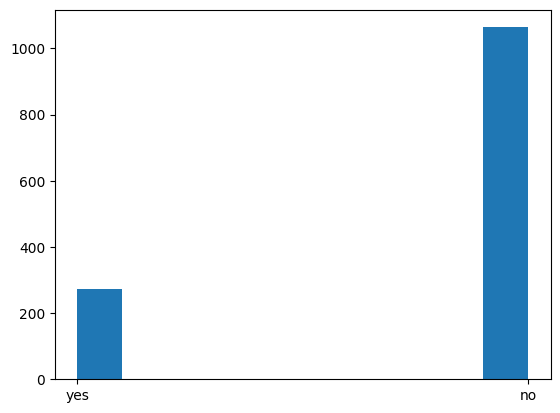

In [14]:
plt.hist(insurance.smoker)

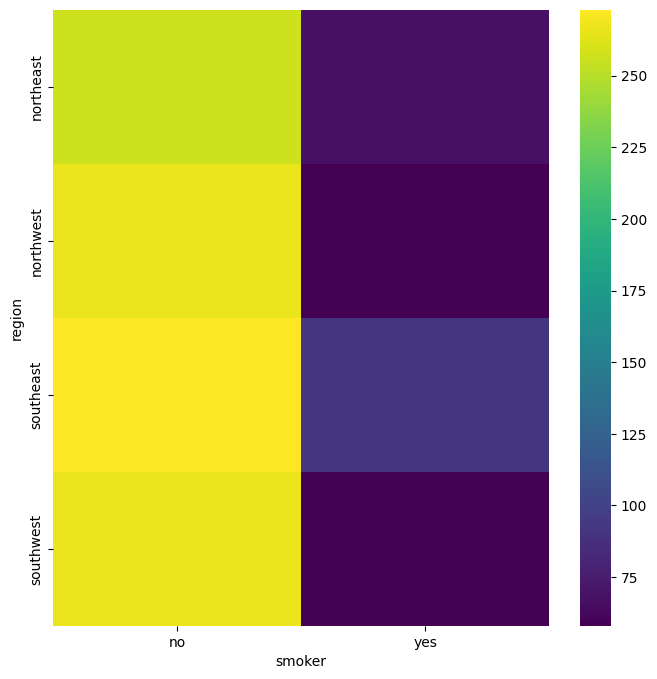

In [15]:
# @title smoker vs region

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in insurance.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

We can see that being a smoker notably increases the insurance charges associated.

In [16]:
#Mean charges for smokers vs non-smokers
smoker_mean = round(insurance[insurance.smoker == 'yes'].charges.mean(),2)
nonsmoker_mean = round(insurance[insurance.smoker == 'no'].charges.mean(),2)
print(f'Smokers tend to be charged an average of $ {smoker_mean} versus $ {nonsmoker_mean} for non-smokers.')

Smokers tend to be charged an average of $ 32050.23 versus $ 8434.27 for non-smokers.


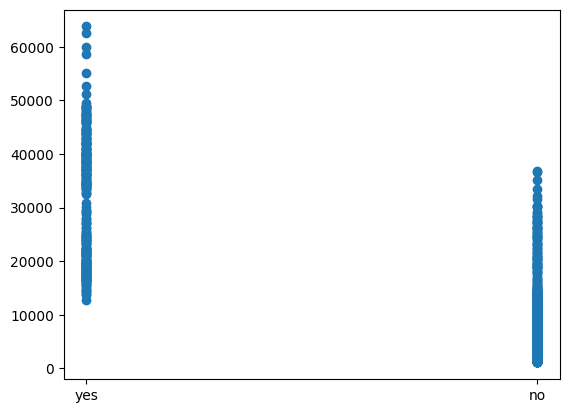

In [17]:
plt.scatter(insurance.smoker, insurance.charges)

# Age vs Health variables

There is no linear relation between age and smoker status.

In [18]:
insurance[insurance.smoker == 'yes'].age.mean()

38.51459854014598

In [19]:
insurance[insurance.smoker == 'no'].age.mean()

39.38533834586466

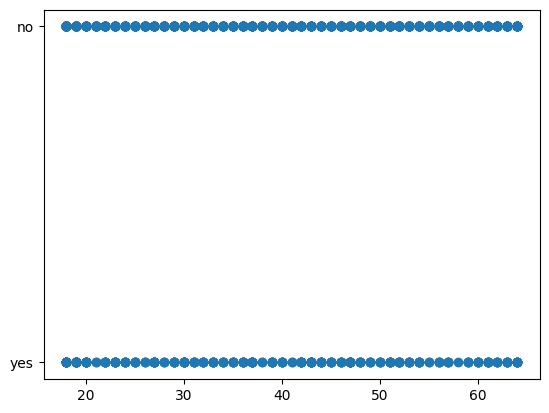

In [20]:
plt.scatter(insurance.age, insurance.smoker)

No linear relation between age and BMI and no relation whatsoever.

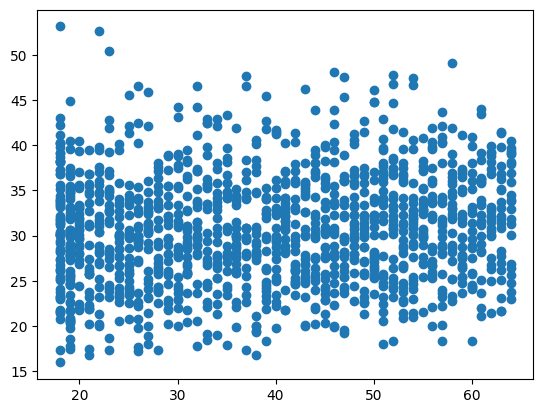

In [21]:
plt.scatter(insurance.age, insurance.bmi)

# Trend Analysis

We can see that age and smoking status represent the two main factors causing an increase in insurance charges.

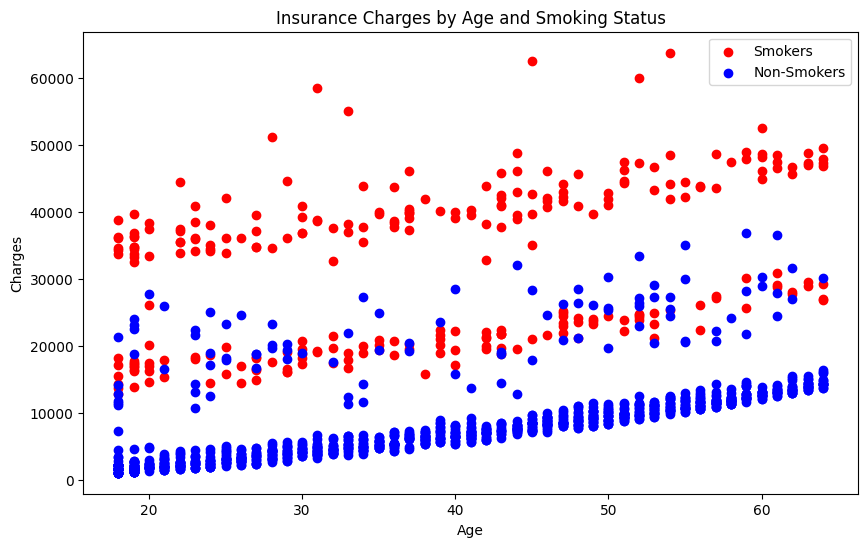

In [22]:
# Filtering smokers and non-smokers
smokers = insurance[insurance['smoker'] == 'yes']
non_smokers = insurance[insurance['smoker'] == 'no']

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjusting figure size
plt.scatter(smokers['age'], smokers['charges'], color='red', label='Smokers')
plt.scatter(non_smokers['age'], non_smokers['charges'], color='blue', label='Non-Smokers')

# Adding titles and labels
plt.title('Insurance Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()  # To add a legend to differentiate smokers and non-smokers

# Showing the plot
plt.show()

In [24]:
insurance['smoker'] = insurance['smoker'].replace({'yes': 1, 'no': 0})
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [25]:
X = insurance.drop(['sex','children', 'region', 'charges'], axis=1)  # Features
y = insurance['charges']  # Target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
# Now, you can use the model to make predictions on X_test_scaled
y_pred = model.predict(X_test_scaled)

In [30]:
model.score(X_test_scaled, y_test)

0.7776932310583375

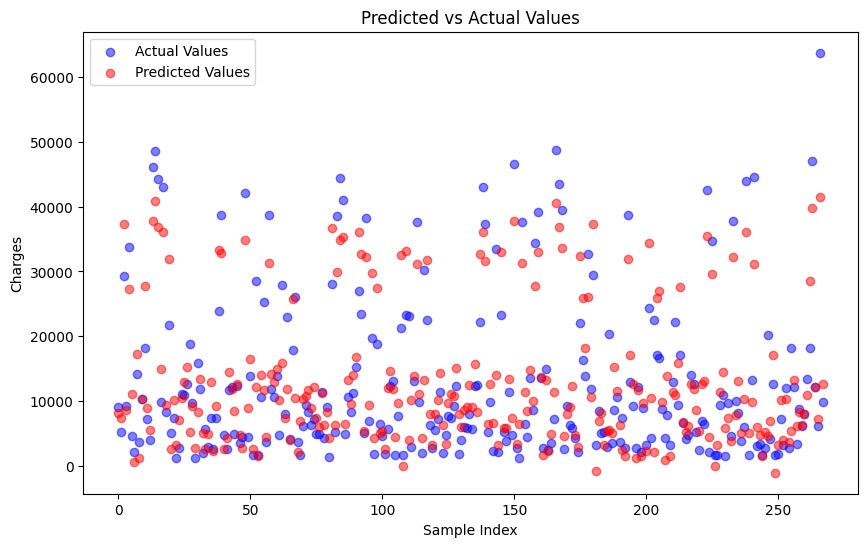

In [31]:
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.5)

# Adding titles and labels
plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.legend()

plt.show()

In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the scores for each fold
print("R^2 scores for each fold:", scores)

# Calculate the average score
print("Average R^2 score:", np.mean(scores))

R^2 scores for each fold: [0.76172245 0.70978635 0.77205988 0.72830177 0.75328122]
Average R^2 score: 0.7450303364713812


In [33]:
X = insurance.drop(['sex', 'region', 'charges'], axis=1)  # Features
y = insurance['charges']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)
# Now, you can use the model to make predictions on X_test_scaled
y_pred = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)

0.7811147722517887

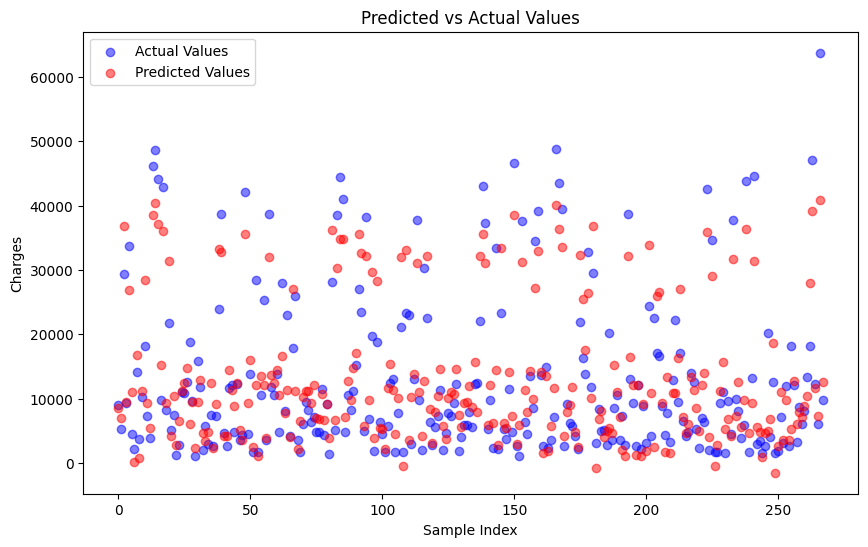

In [34]:
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.5)

# Adding titles and labels
plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.legend()

plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the scores for each fold
print("R^2 scores for each fold:", scores)

# Calculate the average score
print("Average R^2 score:", np.mean(scores))

R^2 scores for each fold: [0.76148164 0.70878211 0.77626525 0.73135307 0.75675099]
Average R^2 score: 0.7469266088153269


In [36]:
insurance['bmi * age'] = insurance.bmi * insurance.age
insurance['bmi * smoker'] = insurance.bmi * insurance.smoker
insurance['age * smoker'] = insurance.age * insurance.smoker
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi * age,bmi * smoker,age * smoker
0,19,female,27.900,0,1,southwest,16884.92400,530.100,27.9,19
1,18,male,33.770,1,0,southeast,1725.55230,607.860,0.0,0
2,28,male,33.000,3,0,southeast,4449.46200,924.000,0.0,0
3,33,male,22.705,0,0,northwest,21984.47061,749.265,0.0,0
4,32,male,28.880,0,0,northwest,3866.85520,924.160,0.0,0


In [37]:
X = insurance.drop(['sex', 'region', 'charges'], axis=1)  # Features
y = insurance['charges']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)
# Now, you can use the model to make predictions on X_test_scaled
y_pred = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)

0.8632389442240379

In [38]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the scores for each fold
print("R^2 scores for each fold:", scores)

# Calculate the average score
print("Average R^2 score:", np.mean(scores))

R^2 scores for each fold: [0.86178641 0.79187126 0.87641426 0.81533018 0.83408034]
Average R^2 score: 0.8358964915043435


In [39]:
X = insurance.drop(['sex','children', 'region', 'charges'], axis=1)  # Features
y = insurance['charges']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)
# Now, you can use the model to make predictions on X_test_scaled
y_pred = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)

0.8593384950146639

In [40]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the scores for each fold
print("R^2 scores for each fold:", scores)

# Calculate the average score
print("Average R^2 score:", np.mean(scores))

R^2 scores for each fold: [0.86143456 0.79127764 0.87166626 0.81192227 0.83163033]
Average R^2 score: 0.8335862105477811


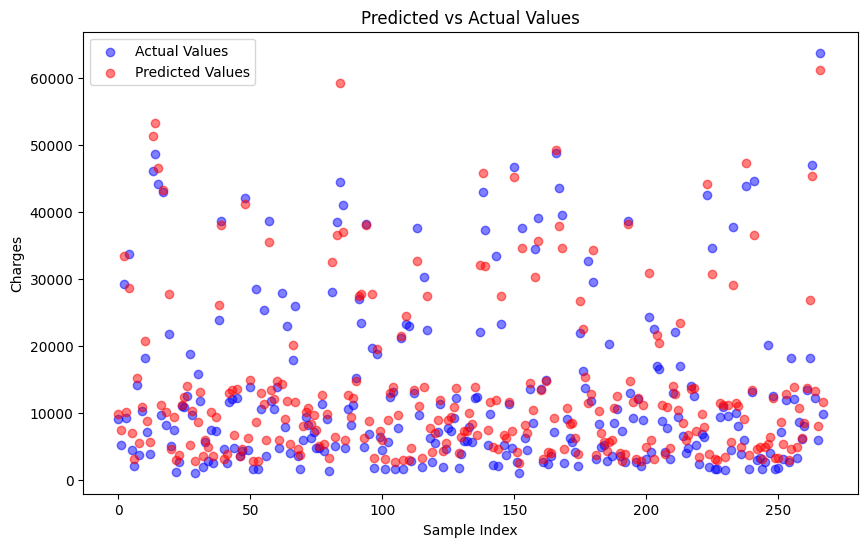

In [36]:
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.5)

# Adding titles and labels
plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.legend()

plt.show()

In [37]:
# Perform 10-fold cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Print the scores for each fold
print("R^2 scores for each fold:", scores)

# Calculate the average score
print("Average R^2 score:", np.mean(scores))

R^2 scores for each fold: [0.87303543 0.84873284 0.81997593 0.7565356  0.85914256 0.88703386
 0.85292178 0.76797589 0.84158139 0.82480907]
Average R^2 score: 0.8331744331389042


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = insurance.drop(['sex','children', 'region', 'charges'], axis=1)  # Features
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 24380201.894237455
R^2 Score: 0.8429603793862281


In [39]:
# Perform 10-fold cross-validation
scores = cross_val_score(random_forest_model, X, y, cv=10, scoring='r2')

# Print the scores for each fold
print("R^2 scores for each fold:", scores)

# Calculate the average score
print("Average R^2 score:", np.mean(scores))

R^2 scores for each fold: [0.84666159 0.84320421 0.79841981 0.704028   0.82540317 0.87828502
 0.84863071 0.77035261 0.83605647 0.82049743]
Average R^2 score: 0.8171539005290157


In [40]:
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

bmi * smoker    0.753461
age             0.099155
bmi * age       0.083699
bmi             0.047297
age * smoker    0.012357
smoker          0.004031
dtype: float64


In [41]:
X = insurance.drop(['sex','children', 'region', 'charges', 'bmi * age', 'age * smoker'], axis=1)  # Features
y = insurance['charges']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)
# Now, you can use the model to make predictions on X_test_scaled
y_pred = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)

0.8589532796323938

In [42]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the scores for each fold
print("R^2 scores for each fold:", scores)

# Calculate the average score
print("Average R^2 score:", np.mean(scores))

R^2 scores for each fold: [0.86169608 0.79191914 0.87179608 0.81144696 0.83133002]
Average R^2 score: 0.8336376553667952
